### **Mehrshad Saadatinia - 97243039**

run the cell below only on Colab

In [34]:
from google.colab import files
uploaded = files.upload()

Saving low.png to low (1).png


In [35]:
##### utility functions #####
def show_image(image):
  plt.imshow(image, cmap='gray')
  plt.show()


def get_histogram(image):  
  hisgram = image.histogram()
  #print(f"histogram values: {hisgram}\n")
  plt.figure(0)
  for i in range(0, 256):
      plt.bar(i, hisgram[i], edgecolor='black')
  plt.show()
  


def pillow_histogram_equalize(image):
  out = ImageOps.equalize(image, mask=None)
  return out


**The original image**<br>
first we load the original image which is a low contrast image using PIL

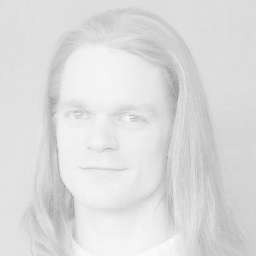

In [36]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

img = Image.open('low.png')
imgray = img.convert(mode='L')
imgray

initial image histogram plot: 



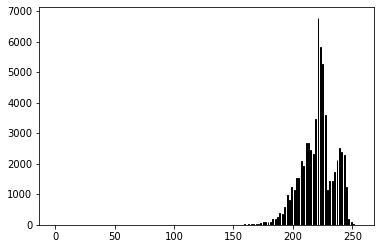

In [37]:
print('initial image histogram plot: \n')
get_histogram(imgray)

### **Part 1**
We write a function manually in order to transform the image with Histogram Equalization algorithm

output generated by my own implementation:



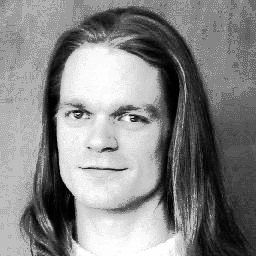

In [38]:
def my_histogram_equalize(image, max_gray=255):
  img_array = np.asarray(image)

  histogram_array = np.bincount(img_array.flatten(), minlength=256)

  #### 1) get PDF of the histogram
  num_pixels = np.sum(histogram_array)
  histogram_array = histogram_array/num_pixels

  #### 2) get CDF of the histogram
  cdf = np.cumsum(histogram_array)

  lookup = np.floor(max_gray * cdf).astype(np.uint8)
  img_list = list(img_array.flatten())
  
  #### 3) transform
  transformed_list = [lookup[p] for p in img_list]
  transformed_array = np.reshape(np.asarray(transformed_list), img_array.shape)
  transformed = Image.fromarray(transformed_array, mode='L')
  return transformed


print('output generated by my own implementation:\n')
my_output = my_histogram_equalize(imgray)
my_output.save('my_out.png')
my_output

histogram plot generated by my own algorithm: 



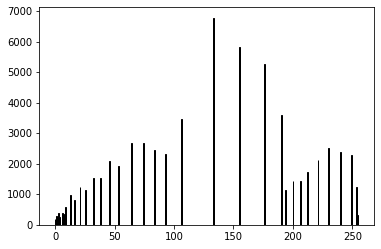

In [39]:
print('histogram plot generated by my own algorithm: \n')
get_histogram(my_output)

###**Part 2**
the results of the equalization using PIL library

output generated by PIL library:



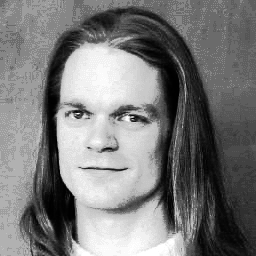

In [40]:
def pillow_histogram_equalize(image):
  out = ImageOps.equalize(image, mask=None)
  return out

print('output generated by PIL library:\n')
pil_output = pillow_histogram_equalize(imgray)
pil_output.save('pil_out.png')
pil_output

histogram plot generated by PIL: 



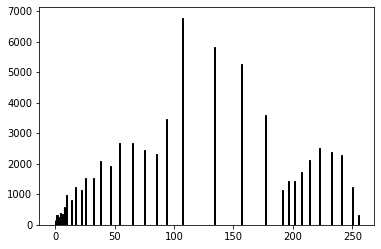

In [41]:
print('histogram plot generated by PIL: \n')
get_histogram(pil_output)

## **result**
**Both algorithms output the same result, so our implementation is correct**